## K Means Clustering Algorithms Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

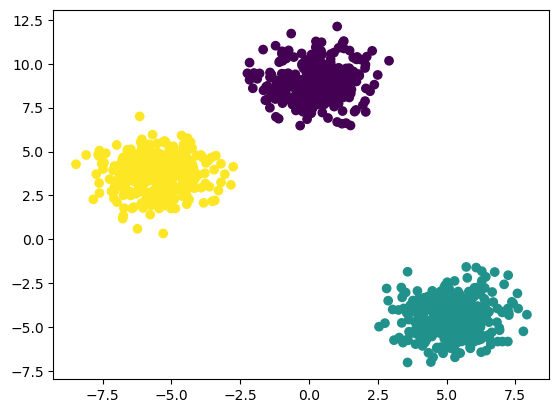

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

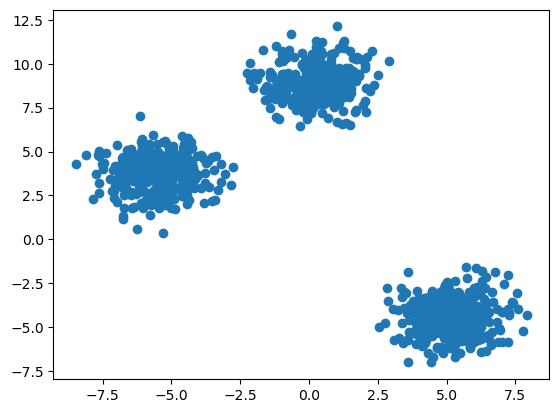

In [6]:
## I egnore feature "y" because I only want to use independent feature X
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
## Manual Process
## Elbow Method to select the K value

WCSS = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [10]:
WCSS

[34827.576825520206,
 7935.437286145418,
 1319.2730531585607,
 1140.4677884655125,
 992.1124381951141,
 854.1038251432577,
 754.6776207298815,
 665.8748881815487,
 579.9856167543451,
 533.1024008918531]

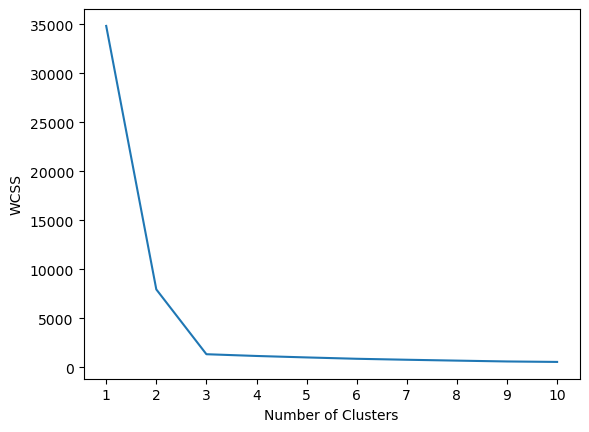

In [11]:
## ploting Elbow curve
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
# here se select k=3 because after 3 we can see WCSS is getting normalize
kmeans = KMeans(n_clusters=3,init='k-means++')

In [13]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# We can also find out the labels of test data
y_test_label = kmeans.predict(X_test)

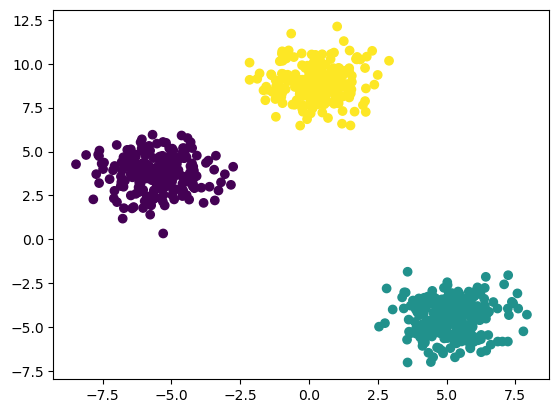

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

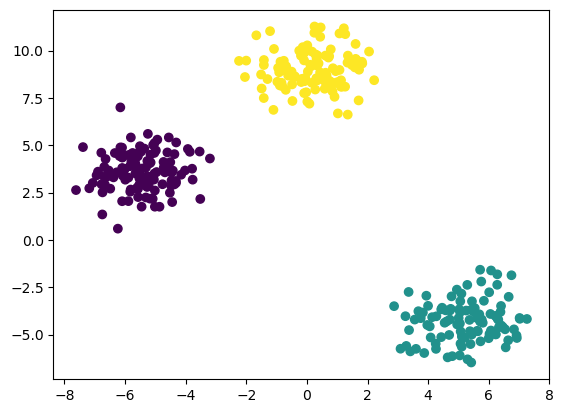

In [16]:
## we can plot it for test data
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [17]:
# If we want to automate this function to find k value
# for this we have to install knee locater

In [18]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [21]:
from kneed import KneeLocator

In [25]:
# If WCSS value increases we put curve value as concave ,decreases we use curve value as concave
kl = KneeLocator(range(1,11),WCSS,curve='convex',direction='decreasing')
kl.elbow

3

In [24]:
# we can see number of cluster is 3

In [26]:
## Performance metrics
## Silhouetee score
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [28]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.34145348255559194,
 0.3485964442111187,
 0.3333087191900093,
 0.3456412132178418,
 0.34020693560708065]

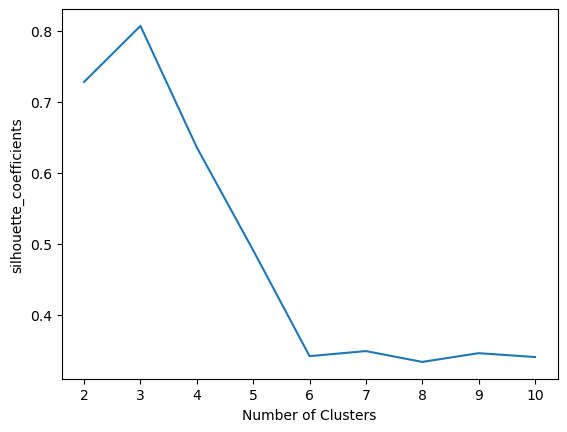

In [29]:
# plotting silhouette score

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()